# 제어공학2 5주차 - Note 1
  > ## Symbolic calculation and Laplace transform with python

## Symbolic Calculation

### sympy library 설치

In [1]:
!pip install sympy

### sympy library import

In [2]:
import sympy as sym

### 수식이 latex 포멧으로 출력되도록 init_printing 함수 호출



In [ ]:
sym.init_printing(use_latex='mathjax')

### 변수를 symbol로 선언하고, 다항식 표현하기

In [ ]:
x, y, z = sym.symbols('x y z')
( 5*x**3 - x**2 + 3*x - 1 ) + ( -x**3 + 2*x**2 + 5 )

   3    2          
4⋅x  + x  + 3⋅x + 4

### 다항식을 변수에 저장하기

In [ ]:
A = -3*x*y + x**2 + 2*y**2 + x
B = ( x**2 + x - 2 ) * ( 3*x - 1 )
A, B

⎛ 2                  2            ⎛ 2        ⎞⎞
⎝x  - 3⋅x⋅y + x + 2⋅y , (3⋅x - 1)⋅⎝x  + x - 2⎠⎠

### 다항식을 symbol 'x'를 기준으로 정리하기

In [ ]:
sym.collect( A, x )

 2                    2
x  + x⋅(1 - 3⋅y) + 2⋅y 

### 다항식을 전개하기

In [ ]:
sym.expand(B)

   3      2          
3⋅x  + 2⋅x  - 7⋅x + 2

### 인수분해가 가능한 다항식을 C에 입력하기

In [ ]:
C = 2*x**2 + 5*x*y + 3*y**2 + 3*x + 5*y - 2
C

   2                    2          
2⋅x  + 5⋅x⋅y + 3⋅x + 3⋅y  + 5⋅y - 2

### 다항식 C를 인수분해하기

In [ ]:
sym.factor(C)

(x + y + 2)⋅(2⋅x + 3⋅y - 1)

### 분수 형태의 다항식을 D에 입력하기

In [ ]:
D = ( x**2 - 2*x + 1 ) / ( x**2 - 3*x + 2 )
D

 2          
x  - 2⋅x + 1
────────────
 2          
x  - 3⋅x + 2

### 분모 분자를 인수분해 후 소거 가능한 항 소거하기

In [ ]:
sym.cancel(D)

x - 1
─────
x - 2

### 분수의 덧셈 형태의 다항식을 E에 입력하기

In [ ]:
E = 1/(x-1) + 2/(x+2)
E

  2       1  
───── + ─────
x + 2   x - 1

### 통분 후 소거 가능한 항 소거하기

In [ ]:
sym.cancel(E)

   3⋅x    
──────────
 2        
x  + x - 2

### 문자 언더바 '_' >> 직전 출력을 의미

In [ ]:
sym.factor(_)

      3⋅x      
───────────────
(x - 1)⋅(x + 2)

### 매우 복잡한 형태의 다항식을 F에 입력하기

In [ ]:
F = ( x - 1 + 1/(x-1) ) / ( x - 1 - 1/(x-1) )
F

          1  
x - 1 + ─────
        x - 1
─────────────
          1  
x - 1 - ─────
        x - 1

### 복잡한 다항식을 가능한 한 간단하게 정리하기

In [ ]:
sym.simplify(F)

 2          
x  - 2⋅x + 2
────────────
 x⋅(x - 2)  

## Laplace Transform

### Laplace transform에서 활용할 변수 t, s를 symbol로 선언하고 함수 f 정의하기

In [4]:
t, s = sym.symbols('t, s')
a = sym.symbols('a', real=True, positive=True)
f = sym.exp(-a*t)
f

exp(-a*t)

### Laplace transform 하기

In [ ]:
F = sym.laplace_transform(f, t, s)
F

⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

### Laplace transform이 가능한 조건 출력을 생략하기

In [ ]:
F = sym.laplace_transform(f, t, s, noconds=True)
F

  1  
─────
a + s

### Laplace transform을 간소하게 처리할 수 있도록 함수 정의하기

In [11]:
def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sym.inverse_laplace_transform(F, s, t)

In [ ]:
L(f)

  1  
─────
a + s

In [ ]:
invL(F)

 -a⋅t     
ℯ    ⋅θ(t)

### $\theta(t)$는 unit step function을 의미한다

In [ ]:
sym.Heaviside(t)

θ(t)

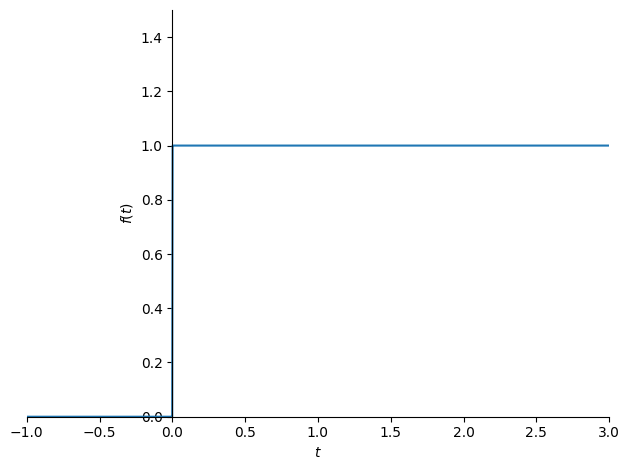

In [ ]:
sym.plot(sym.Heaviside(t), xlim=(-1, 3), ylim=(0, 1.5))

### 함수 내 변수에 특정 숫자를 대입하는 방법

In [ ]:
invL(F).subs({a: 2})

 -2⋅t     
ℯ    ⋅θ(t)

### 다양한 함수를 Laplace transform 해보기

In [9]:
omega = sym.symbols('omega', real=True)
theta = sym.Function('theta')(t)
exp = sym.exp
sin = sym.sin
cos = sym.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         sym.diff(theta,t)
         ]
functions

[1,
 t,
 exp(-a*t),
 t*exp(-a*t),
 t**2*exp(-a*t),
 sin(omega*t),
 cos(omega*t),
 1 - exp(-a*t),
 exp(-a*t)*sin(omega*t),
 exp(-a*t)*cos(omega*t),
 Derivative(theta(t), t)]

### 다양한 함수를 inverse Laplace transform 해보기

In [23]:
L(sym.diff(theta,t)).subs({theta.subs({t:0}):0})

s*LaplaceTransform(theta(t), t, s)

In [12]:
Fs = [L(f) for f in functions]
Fs

[1/s,
 s**(-2),
 1/(a + s),
 (a + s)**(-2),
 2/(a + s)**3,
 omega/(omega**2 + s**2),
 s/(omega**2 + s**2),
 -1/(a + s) + 1/s,
 omega/(omega**2 + (a + s)**2),
 (a + s)/(omega**2 + (a + s)**2),
 s*LaplaceTransform(theta(t), t, s) - theta(0)]